In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
#Getting region 270-355 for DIFF BUM HMM OUTPUT 

df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [269:355, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output.head

<bound method NDFrame.head of                UM             MU
270  1.610805e-11   1.586054e-07
271  1.407343e-13   6.084909e-21
272  1.036717e-11   6.032699e-26
273  3.946810e-28   6.876148e-57
274  3.802900e-28   3.491450e-58
275  8.958519e-11   1.066627e-60
276  6.808013e-22   8.155365e-57
277  1.119753e-20   9.716468e-61
278  1.371585e-34   9.562209e-53
279  6.115684e-23   2.781670e-34
280  1.497805e-05   1.718540e-14
281  9.950746e-01   5.251767e-38
282  9.985545e-01   6.929247e-60
283  2.849179e-27   3.764359e-70
284  8.166069e-78  7.261607e-116
285  4.790286e-26   6.240554e-69
286  7.401482e-10   1.628728e-29
287  1.026336e-20   5.443082e-40
288  1.591416e-26   5.581048e-60
289  5.968215e-37   4.064507e-64
290  6.578168e-35   1.148222e-35
291  3.681830e-33   3.883102e-56
292  4.257704e-22   5.232182e-58
293  3.540301e-61   1.774854e-83
294  5.816544e-47   5.966831e-76
295  1.480093e-22   1.369877e-47
296  3.429197e-94  1.073187e-130
297  1.198197e-20   2.266247e-46
298  8.058807

In [3]:
#Getting region 270-355 FOR PEA DATA

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Data/35S_pre_rRNA_PEA_data.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[269:355, :]

#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head



<bound method NDFrame.head of      positions  deltaErb    delta5
269        270  0.000000  0.000000
270        271  0.000000  0.000000
271        272  0.251014  0.000000
272        273  0.000000  0.000000
273        274  0.000000  0.000000
274        275  0.000000  0.000000
275        276  0.451733  0.276446
276        277  0.479568  0.351000
277        278  0.000000  0.000000
278        279  0.000000  0.000000
279        280  0.000000  0.000000
280        281  0.339467  0.313167
281        282  0.396604  0.000000
282        283  0.762305  0.275519
283        284  0.000000  0.000000
284        285  0.000000  0.000000
285        286  0.000000  0.000000
286        287  0.000000  0.000000
287        288  0.000000  0.000000
288        289  0.000000  0.000000
289        290  0.000000  0.000000
290        291  0.000000  0.000000
291        292  0.000000  0.000000
292        293  0.000000  0.000000
293        294  0.000000  0.000000
294        295  0.000000  0.000000
295        296  0.000000 

In [4]:
#MERGING THE DATAFRAMES 
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

<bound method NDFrame.head of            deltaErb    delta5            UM             MU
positions                                                 
270        0.000000  0.000000  1.610805e-11   1.586054e-07
271        0.000000  0.000000  1.407343e-13   6.084909e-21
272        0.251014  0.000000  1.036717e-11   6.032699e-26
273        0.000000  0.000000  3.946810e-28   6.876148e-57
274        0.000000  0.000000  3.802900e-28   3.491450e-58
275        0.000000  0.000000  8.958519e-11   1.066627e-60
276        0.451733  0.276446  6.808013e-22   8.155365e-57
277        0.479568  0.351000  1.119753e-20   9.716468e-61
278        0.000000  0.000000  1.371585e-34   9.562209e-53
279        0.000000  0.000000  6.115684e-23   2.781670e-34
280        0.000000  0.000000  1.497805e-05   1.718540e-14
281        0.339467  0.313167  9.950746e-01   5.251767e-38
282        0.396604  0.000000  9.985545e-01   6.929247e-60
283        0.762305  0.275519  2.849179e-27   3.764359e-70
284        0.000000  0.000

In [5]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.95 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.95 else x for x in new_df['MU']]

In [6]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','delta5','deltaErb']]
#print(new_df.columns)

new_df.columns = ['more flexible in delta5 - DIFF BUM HMM', 'more flexible in Erb1 - DIFF BUM HMM','delta5 - PEA', 'Erb1 - PEA'  ]
#print(new_df.columns)

In [7]:
print(new_df.columns)

Index(['more flexible in delta5 - DIFF BUM HMM',
       'more flexible in Erb1 - DIFF BUM HMM', 'delta5 - PEA', 'Erb1 - PEA'],
      dtype='object')


In [8]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')
#print(ref_sequence)

subsequence= []
for i in ref_sequence[269:355]: 
    subsequence.append(i)
    
#column_values = pd.Series(mylist)
#Then use the insert function to add the column. This function has the advantage to let you choose in which position you want to place the column. In the following example we will position the new column in the first position from left (by setting loc=0)
#column_values = pd.Series(subsequence)
#column_values = column_values.reset_index()
new_df.insert(loc=4, column='nucleotide', value=subsequence)
#print(column_values)


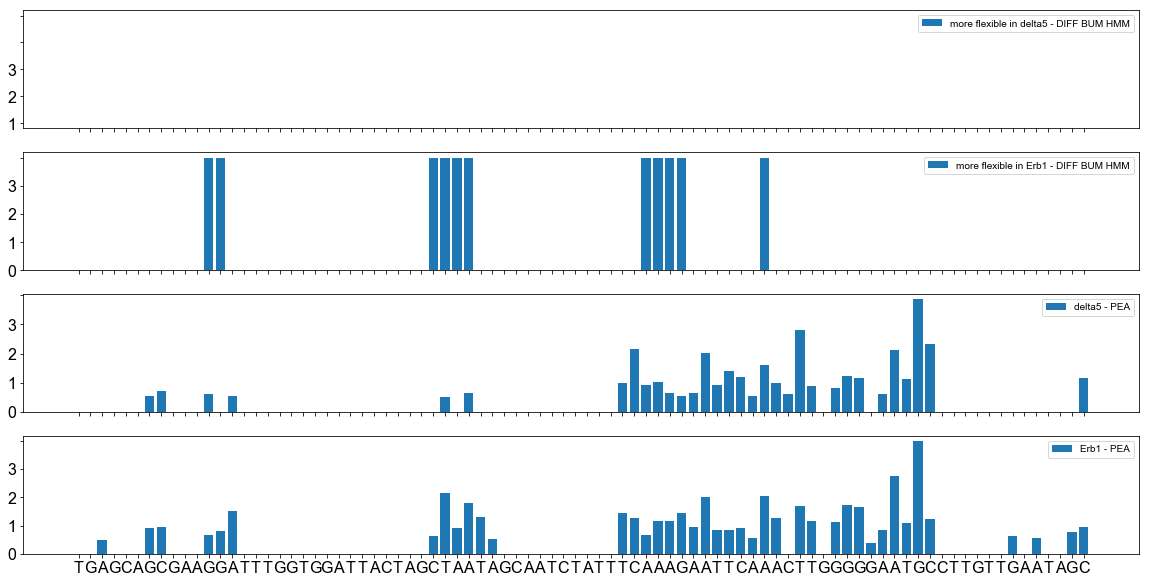

In [9]:
fig,ax = plt.subplots(4,sharex=True,figsize=[20,10])
x = new_df.index
for i in range(4):
    column = new_df.columns[i]
    y = new_df[column]
    ax[i].bar(x,y)
    ax[i].set_xticklabels(x,fontsize=16)
    miny = 0
    maxy = 3
    yticks = np.arange(miny,maxy+1,1)
    ax[i].set_yticklabels(yticks,fontsize=16)
    xticks = np.arange(min(x),max(x)+1)
    ax[i].set_xticks(xticks)
    nucleotides = new_df['nucleotide']
    ax[i].set_xticklabels(nucleotides)
    ax[i].legend([column])
fig.savefig("diff_BUM_HMM_vs_PEA_plot_270_355.pdf",dpi=400)   

In [10]:
#Getting region 370-500 for DIFF BUM HMM OUTPUT 

df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [369:500, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output.head

<bound method NDFrame.head of                 UM            MU
370   5.095208e-14  2.141657e-17
371   9.073893e-23  4.445520e-29
372   7.884467e-36  4.866210e-30
373   4.084045e-72  4.382681e-52
374   4.295276e-59  2.586848e-41
375   3.595528e-65  1.805399e-52
376  4.990138e-105  2.623042e-80
377   1.802541e-51  2.999490e-53
378   5.671276e-65  7.538067e-50
379   2.701896e-14  6.918073e-11
380   9.937746e-32  3.113985e-20
381   4.106143e-23  2.995389e-14
382   2.432438e-12  1.482121e-07
383   1.890507e-20  2.381992e-16
384   3.193935e-10  6.871806e-10
385   3.875090e-11  1.596933e-16
386   1.219403e-07  5.536761e-12
387   6.093322e-44  1.017272e-21
388   1.805399e-52  2.901752e-43
389   7.061153e-49  2.559090e-34
390   1.618796e-32  3.425156e-19
391   5.833180e-31  4.122550e-37
392   1.703457e-04  1.848477e-12
393   1.191247e-51  7.353021e-34
394   1.161088e-26  3.222501e-06
395   4.693303e-24  9.392637e-14
396   6.090991e-07  1.928883e-05
397   8.169958e-09  9.937750e-01
398   1.91182

In [11]:
#Getting region 370-500 FOR PEA DATA

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Data/35S_pre_rRNA_PEA_data.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[369:500, :]

#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head

<bound method NDFrame.head of      positions  deltaErb    delta5
369        370  0.000000  0.000000
370        371  0.000000  0.000000
371        372  0.000000  0.000000
372        373  0.000000  0.000000
373        374  0.000000  0.000000
374        375  0.000000  0.000000
375        376  0.000000  0.000000
376        377  0.000000  0.000000
377        378  0.000000  0.000000
378        379  0.000000  0.000000
379        380  0.000000  0.000000
380        381  0.000000  0.000000
381        382  0.325647  0.322743
382        383  0.000000  0.000000
383        384  0.000000  0.000000
384        385  0.000000  0.000000
385        386  0.000000  0.000000
386        387  0.000000  0.000000
387        388  0.000000  0.000000
388        389  0.000000  0.000000
389        390  0.000000  0.000000
390        391  0.000000  0.000000
391        392  0.309052  0.000000
392        393  0.000000  0.000000
393        394  0.000000  0.290721
394        395  0.000000  0.262954
395        396  0.640433 

In [12]:
#MERGING THE DATAFRAMES 
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

<bound method NDFrame.head of            deltaErb    delta5             UM            MU
positions                                                 
370        0.000000  0.000000   5.095208e-14  2.141657e-17
371        0.000000  0.000000   9.073893e-23  4.445520e-29
372        0.000000  0.000000   7.884467e-36  4.866210e-30
373        0.000000  0.000000   4.084045e-72  4.382681e-52
374        0.000000  0.000000   4.295276e-59  2.586848e-41
375        0.000000  0.000000   3.595528e-65  1.805399e-52
376        0.000000  0.000000  4.990138e-105  2.623042e-80
377        0.000000  0.000000   1.802541e-51  2.999490e-53
378        0.000000  0.000000   5.671276e-65  7.538067e-50
379        0.000000  0.000000   2.701896e-14  6.918073e-11
380        0.000000  0.000000   9.937746e-32  3.113985e-20
381        0.000000  0.000000   4.106143e-23  2.995389e-14
382        0.325647  0.322743   2.432438e-12  1.482121e-07
383        0.000000  0.000000   1.890507e-20  2.381992e-16
384        0.000000  0.000

In [13]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.95 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.95 else x for x in new_df['MU']]

In [14]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','delta5','deltaErb']]
#print(new_df.columns)

new_df.columns = ['more flexible in delta5 - DIFF BUM HMM', 'more flexible in Erb1 - DIFF BUM HMM','delta5 - PEA', 'Erb1 - PEA'  ]
#print(new_df.columns)

In [15]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')
#print(ref_sequence)

subsequence= []
for i in ref_sequence[369:500]: 
    subsequence.append(i)
    
#column_values = pd.Series(mylist)
#Then use the insert function to add the column. This function has the advantage to let you choose in which position you want to place the column. In the following example we will position the new column in the first position from left (by setting loc=0)
#column_values = pd.Series(subsequence)
#column_values = column_values.reset_index()
new_df.insert(loc=4, column='nucleotide', value=subsequence)
#print(column_values)


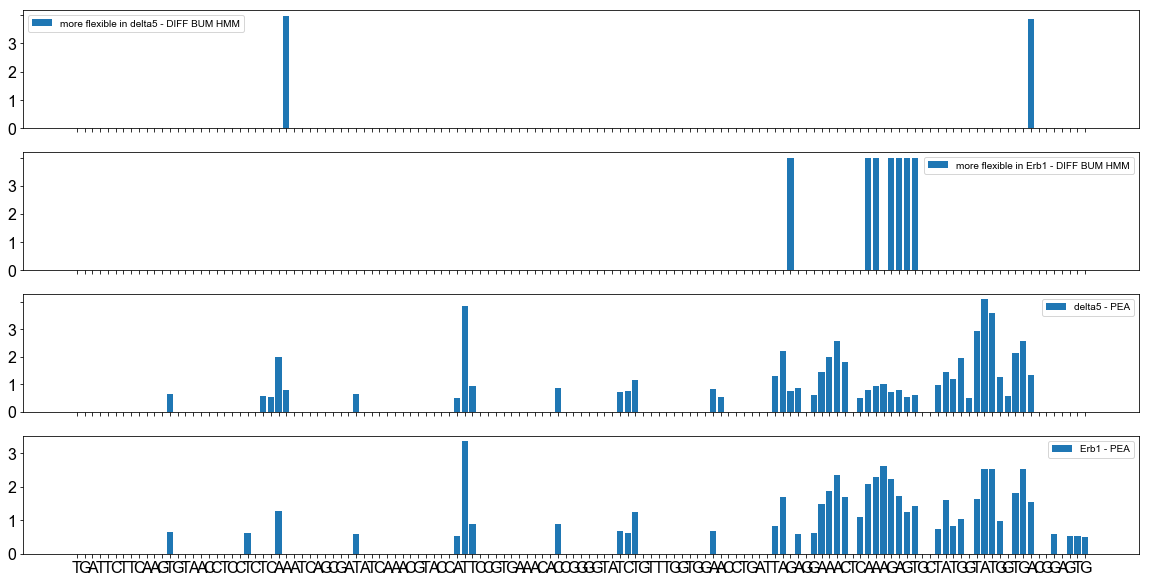

In [17]:
fig,ax = plt.subplots(4,sharex=True,figsize=[20,10])
x = new_df.index
for i in range(4):
    column = new_df.columns[i]
    y = new_df[column]
    ax[i].bar(x,y)
    ax[i].set_xticklabels(x,fontsize=16)
    miny = 0
    maxy = 3
    yticks = np.arange(miny,maxy+1,1)
    ax[i].set_yticklabels(yticks,fontsize=16)
    xticks = np.arange(min(x),max(x)+1)
    ax[i].set_xticks(xticks)
    nucleotides = new_df['nucleotide']
    ax[i].set_xticklabels(nucleotides)
    ax[i].legend([column])
fig.savefig("diff_BUM_HMM_vs_PEA_plot_370_500.pdf",dpi=400) 